In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
df=pd.read_csv('World Population by country 2024.csv')
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,World Rank
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801,1
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780,2
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427,3
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350,4
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306,5


In [7]:
df=df.drop(['World Rank'],axis=1)
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Population 2024  234 non-null    int64  
 2   Population 2023  234 non-null    int64  
 3   Area (km2)       234 non-null    object 
 4   Density (/km2)   234 non-null    float64
 5   Growth Rate      234 non-null    float64
 6   World %          228 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 12.9+ KB


In [9]:
df.columns

Index(['Country', 'Population 2024', 'Population 2023', 'Area (km2)',
       'Density (/km2)', 'Growth Rate', 'World %'],
      dtype='object')

In [10]:
df.isnull().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            6
dtype: int64

##handling missing values


In [11]:
df.fillna(0,inplace=True)
df.isnull().sum()

Country            0
Population 2024    0
Population 2023    0
Area (km2)         0
Density (/km2)     0
Growth Rate        0
World %            0
dtype: int64

In [12]:
df.head()

,Country,Population 2024,Population 2023,Area (km2),Density (/km2),Growth Rate,World %
0,India,1441719852,1428627663,3M,485.0,0.0092,0.1801
1,China,1425178782,1425671352,9.4M,151.0,-0.0003,0.1780
2,United States,341814420,339996563,9.1M,37.0,0.0053,0.0427
3,Indonesia,279798049,277534122,1.9M,149.0,0.0082,0.0350
4,Pakistan,245209815,240485658,770.9K,318.0,0.0196,0.0306


##Visualization

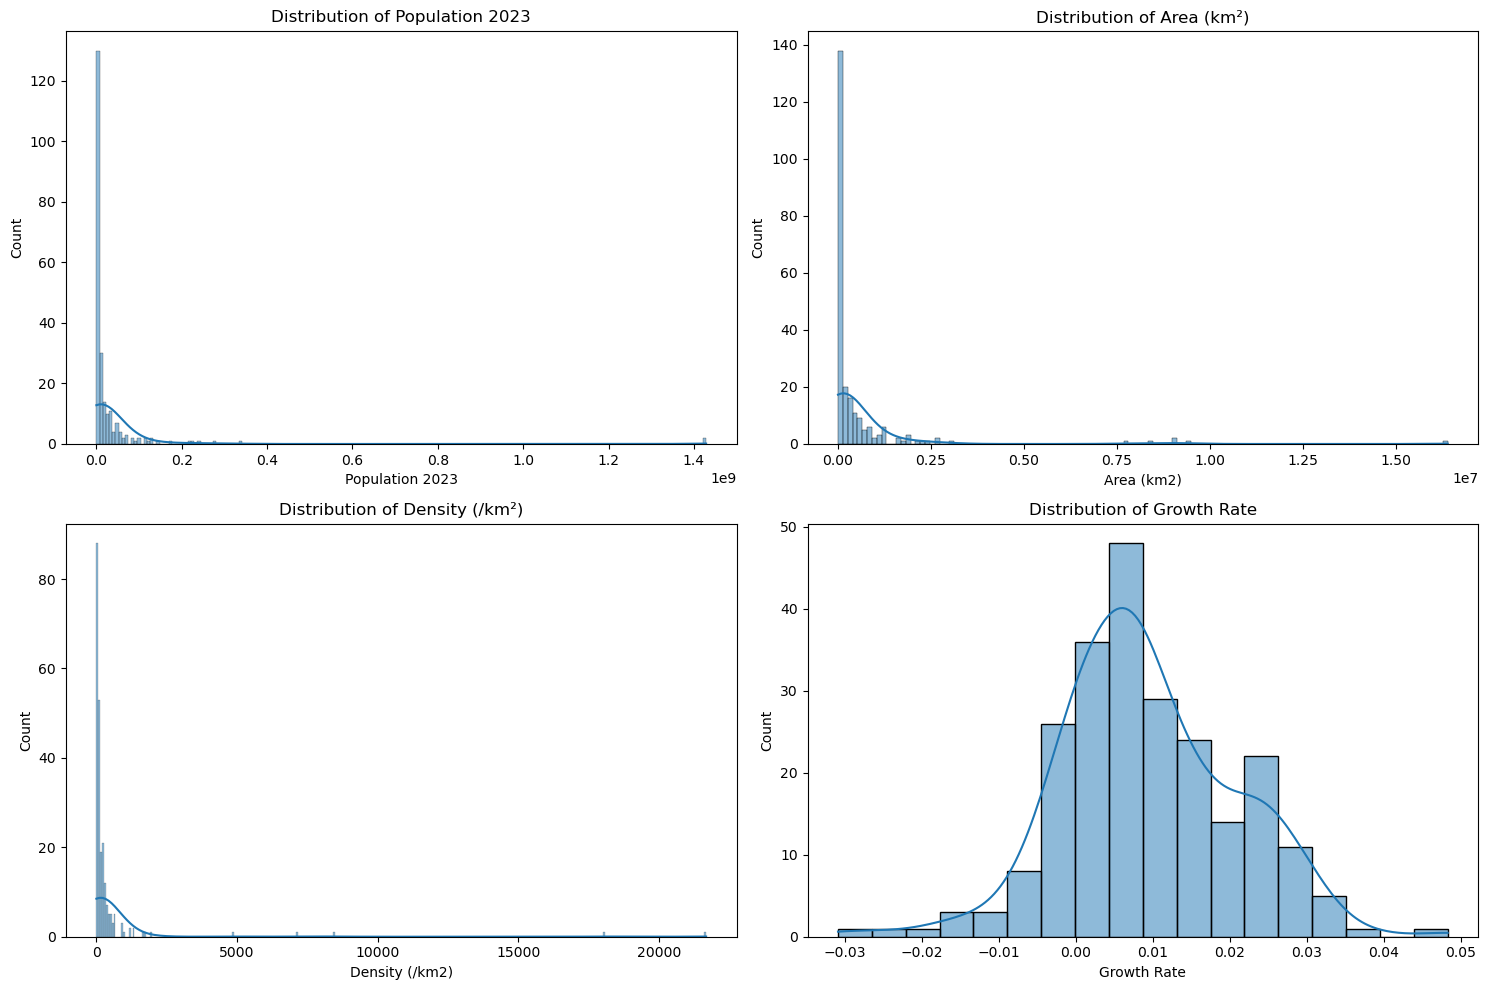

In [13]:
# converting area to type float
def convert_area(area):
    if isinstance(area, str):
        if area == '< 1':
            return 0.5
        if 'M' in area:
            return float(area.replace('M', '')) * 1000000
        elif 'K' in area:
            return float(area.replace('K', '')) * 1000
    return float(area)
df['Area (km2)'] = df['Area (km2)'].apply(convert_area)
df["pop change"] = df["Population 2024"]- df["Population 2023"]
x = df[['Population 2023', 'Area (km2)', 'Density (/km2)', 'Growth Rate', 'World %', 'pop change']]
y = df['Population 2024']
#Plotting Population 2024 vs count
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Population 2023'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Population 2023')
#Plotting Area vs count
sns.histplot(df['Area (km2)'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Area (km²)')
#Plotting Density 2024 vs count
sns.histplot(df['Density (/km2)'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Density (/km²)')
#Plotting Growth rate vs count
sns.histplot(df['Growth Rate'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Growth Rate')

plt.tight_layout()
plt.show()

<Axes: xlabel='Country', ylabel='Population 2024'>

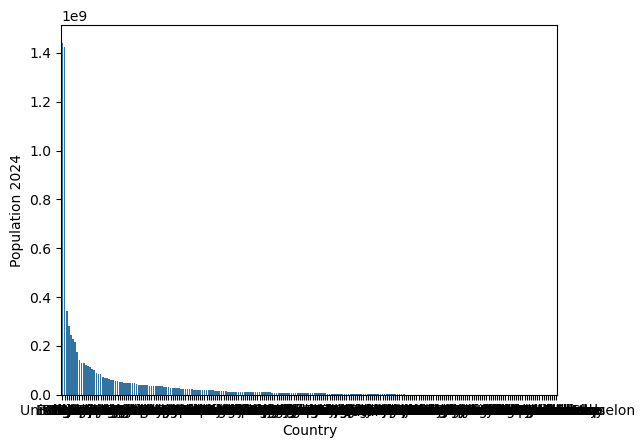

In [14]:
sns.barplot(x='Country', y='Population 2024',data=df)

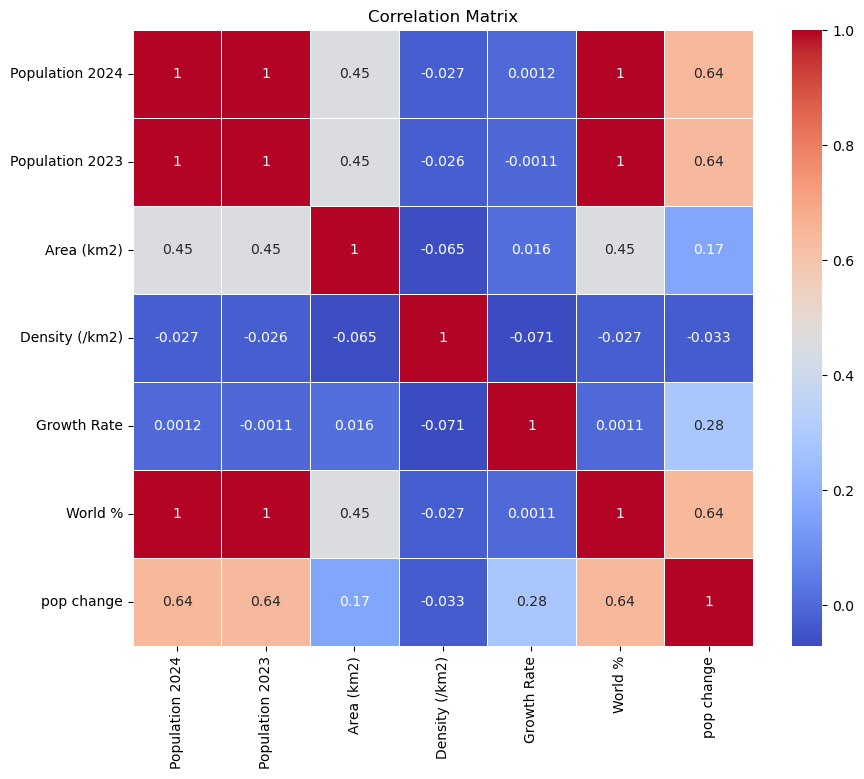

In [15]:
#correlation matrix using numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##Pre-Processing

##Model Training

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)
print("Model training using linear regression")
regressor=LinearRegression()
reg=regressor.fit(x_scaled,y_train)
print("REG SCORE")
print(reg.score(x_scaled_test,y_test))
y_pred1=reg.predict(x_scaled_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred1))
print("R2 SCORE")
print(r2_score(y_test,y_pred1))

Model training using linear regression
REG SCORE
1.0
MEAN SQUARED ERROR
3.166481161783017e-16
R2 SCORE
1.0


In [17]:
from sklearn.tree import DecisionTreeRegressor
print("Model training using DECISION TREE REGRESSOR")
clf = DecisionTreeRegressor()
clf.fit(x_scaled,y_train)
print("Model Training using decision tree")
print(clf.score(x_test,y_test))
y_pred2=clf.predict(x_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred2))
print("R2 SCORE")
print(r2_score(y_test,y_pred2))

Model training using DECISION TREE REGRESSOR
Model Training using decision tree
-2276.846316994171
MEAN SQUARED ERROR
1.9843014787873736e+18
R2 SCORE
-2276.846316994171


d:\Applications\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\Applications\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestRegressor
print("Model training using RANDOM FOREST REGRESSOR")
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
y_pred3=clf.predict(x_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred3))
print("R2 SCORE")
print(r2_score(y_test,y_pred3))

Model training using RANDOM FOREST REGRESSOR
0.9968409752916403
MEAN SQUARED ERROR
2751922881520.716
R2 SCORE
0.9968409752916403


In [19]:
from sklearn.svm import SVR
print("Model training using SVR")
clf=SVR()
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
y_pred4=clf.predict(x_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred4))
print("R2 SCORE")
print(r2_score(y_test,y_pred4))

Model training using SVR
-0.12031250769683388
MEAN SQUARED ERROR
975938433221571.6
R2 SCORE
-0.12031250769683388


In [20]:
# Linear regression has least mean squared error

In [21]:
print(type(y_pred1))
print(type(y_test))
print(type(x_test))
print(type(x_scaled))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [22]:
y_pred1=pd.Series(y_pred1,index=y_test.index,name='y_pred')
df_new=pd.concat([x_test,y_test.rename('y_test'),y_pred1],axis=1)
df_new.reset_index(drop=True,inplace=True)
df_new.head()

,Population 2023,Area (km2),Density (/km2),Growth Rate,World %,pop change,y_test,y_pred
0,18092026,107200.0,171.0,0.0147,0.0023,266404,18358430,18358430.0
1,63544,63.0,1013.0,0.0038,0.0000,244,63788,63788.0
2,335995,374.0,925.0,0.0298,0.0000,10001,345996,345996.0
3,126527060,1100000.0,115.0,0.0252,0.0162,3192659,129719719,129719719.0
4,4468087,74200.0,61.0,0.0134,0.0006,59874,4527961,4527961.0


In [23]:
df_new.to_csv('World Population 2024 REPORT',header=True,index=True)